In [2]:
import pandas as pd
import chess.pgn
import matplotlib.pyplot as plt

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


### Loading in all the data

In [3]:
# Load the PGN file containing the Lichess games
pgn_file = open('lichess_sseth333_games.pgn')

games = []

# Loop through each game in the PGN file
while True:
    # Read in the next game from the PGN file
    game = chess.pgn.read_game(pgn_file)
    if game is None:
        break
    
    # Extract the game data and append it to the list
    games.append({
        'Event': game.headers['Event'],
        'Site': game.headers['Site'],
        'Date': game.headers['Date'],
        'White': game.headers['White'],
        'Black': game.headers['Black'],
        'Result': game.headers['Result'],
        'UTCTime': game.headers['UTCTime'],
        'UTCDate': game.headers['UTCDate'],
        'WhiteElo': game.headers['WhiteElo'],
        'BlackElo': game.headers['BlackElo'],
        'Variant': game.headers['Variant'],
        'TimeControl': game.headers['TimeControl'],
        'ECO': game.headers['ECO'],
        'Termination': game.headers['Termination'],
        'Opening': game.headers['Opening'],
        'Moves': game.mainline_moves()
    })

# Convert the list of games to a pandas DataFrame
df = pd.DataFrame(games)
df

,Event,Site,Date,White,Black,Result,UTCTime,UTCDate,WhiteElo,BlackElo,Variant,TimeControl,ECO,Termination,Opening,Moves
0,Rated Blitz game,https://lichess.org/qwx9tF5P,2023.05.04,PAASHUPATASTRA,sseth333,1-0,06:39:50,2023.05.04,2006,2018,Standard,180+0,A35,Normal,"English Opening: Symmetrical Variation, Four K...",1. c4 { [%clk 0:03:00] } 1... c5 { [%clk 0:03:...
1,Rated Blitz game,https://lichess.org/jUEFJj1s,2023.05.04,sseth333,alex_alex6,0-1,06:18:13,2023.05.04,2023,2049,Standard,180+0,A11,Normal,English Opening: Caro-Kann Defensive System,1. c4 { [%clk 0:03:00] } 1... c6 { [%clk 0:03:...
2,Rated Blitz game,https://lichess.org/0EsXLA1j,2023.05.04,Suzonic,sseth333,0-1,06:15:09,2023.05.04,2017,2018,Standard,180+0,B30,Normal,Sicilian Defense: Old Sicilian,1. e4 { [%clk 0:03:00] } 1... c5 { [%clk 0:03:...
3,Rated Blitz game,https://lichess.org/El5QxPjR,2023.05.04,sseth333,jonmikael,1-0,05:58:34,2023.05.04,2012,2011,Standard,180+0,A11,Time forfeit,English Opening: Caro-Kann Defensive System,1. c4 { [%clk 0:03:00] } 1... c6 { [%clk 0:03:...
4,Rated Blitz game,https://lichess.org/e7foeY6I,2023.05.04,Learner_of_Rosen,sseth333,0-1,05:49:43,2023.05.04,1968,2007,Standard,180+0,A43,Time forfeit,Benoni Defense: Old Benoni,1. d4 { [%clk 0:03:00] } 1... c5 { [%clk 0:03:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Rated Bullet game,https://lichess.org/R6ZRwa5F,2021.08.02,Mehidi10,sseth333,1-0,09:15:35,2021.08.02,1592,1592,Standard,60+0,A71,Time forfeit,"Benoni Defense: Classical Variation, Averbakh-...",1. d4 { [%eval 0.0] [%clk 0:01:00] } 1... c5 {...
8804,Rated Bullet game,https://lichess.org/At7Tj1X0,2021.08.02,RayhanChezz,sseth333,0-1,09:13:11,2021.08.02,1510,1511,Standard,60+0,B30,Normal,Sicilian Defense: Old Sicilian,1. e4 { [%eval 0.24] [%clk 0:01:00] } 1... c5 ...
8805,Rated Bullet game,https://lichess.org/GYb0cZc2,2021.08.02,sseth333,amar72,1-0,09:11:05,2021.08.02,1380,1465,Standard,60+0,A13,Time forfeit,English Opening: Agincourt Defense,1. c4 { [%eval 0.2] [%clk 0:01:00] } 1... e6 {...
8806,Rated Bullet game,https://lichess.org/2B9JLzTU,2021.08.02,valia_prv,sseth333,0-1,09:08:56,2021.08.02,1185,1267,Standard,60+0,B30,Time forfeit,Sicilian Defense: Old Sicilian,1. e4 { [%clk 0:01:00] } 1... c5 { [%clk 0:01:...


### Number of games by hour

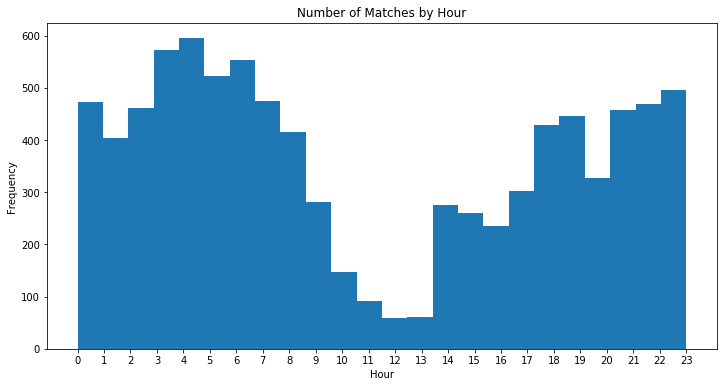

In [4]:
df['Hour'] = pd.to_datetime(df['UTCTime']).dt.hour

plt.figure(figsize=(12, 6))

plt.hist(df['Hour'], bins=24)

plt.title('Number of Matches by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.show()

### Number of games by date

In [8]:
# Convert the Date column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')

# Group the games by date and count the number of games played on each day
games_by_date = df.groupby('Date')['Date'].count()

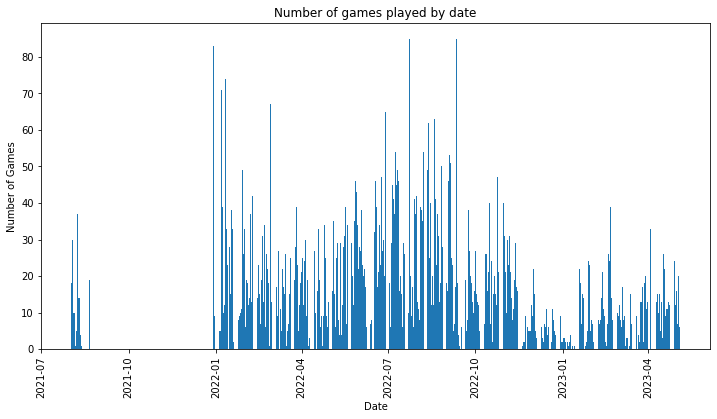

In [15]:
plt.figure(figsize=(12, 6))

# Create a bar plot of the number of games by date
plt.bar(games_by_date.index, games_by_date.values)

plt.title('Number of games played by date')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

### Numer of games by week

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


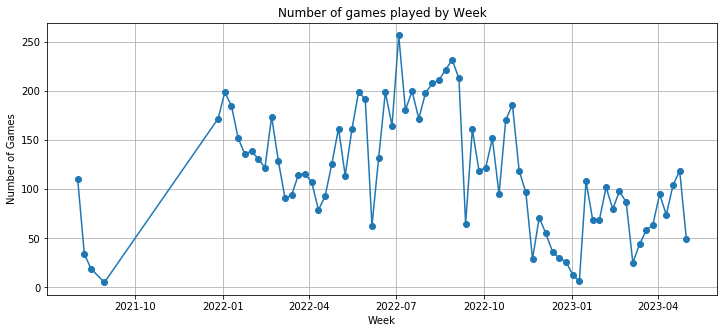

In [17]:
# Group by week
df["Week"] = df["Date"] - pd.to_timedelta(df["Date"].dt.weekday, unit="D")
games_per_week = df.groupby("Week").size()

# Plot the number of games per week
plt.figure(figsize=(12, 5))
plt.plot(games_per_week.index, games_per_week.values, marker="o", linestyle="-")
plt.xlabel("Week")
plt.ylabel("Number of Games")
plt.title("Number of games played by Week")
plt.grid(True)
plt.show()

### Number of games by month

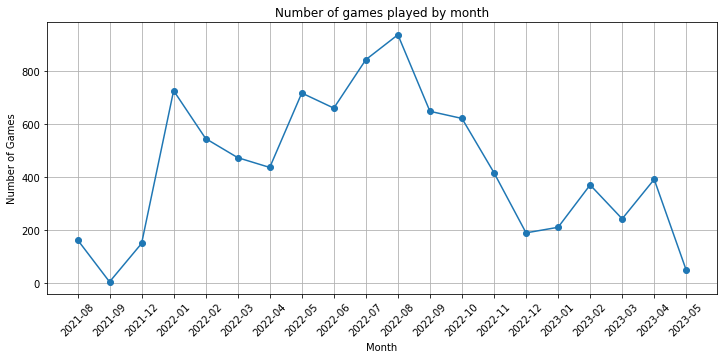

In [18]:
df["Month"] = df["Date"].dt.to_period("M")
games_per_month = df.groupby("Month").size()

# Plot the number of games per month
plt.figure(figsize=(12, 5))
plt.plot(games_per_month.index.astype(str), games_per_month.values, marker="o", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Number of Games")
plt.title("Number of games played by month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Top 10 most played Openings

In [23]:
df['Opening'].value_counts()[:10]

Benoni Defense: Old Benoni                                         835
Sicilian Defense: Old Sicilian                                     469
English Opening: Agincourt Defense                                 432
Sicilian Defense: LÃ¶wenthal Variation                             356
English Opening: Anglo-Scandinavian Defense                        334
English Opening: Anglo-Indian Defense, Queen's Knight Variation    308
English Opening                                                    295
English Opening: King's English Variation, Reversed Sicilian       279
English Opening: Great Snake Variation                             278
English Opening: Caro-Kann Defensive System                        270
Name: Opening, dtype: int64

Yes, I really love the English Opening.

### Breakdown games by Result

In [22]:
df['Result'].value_counts(normalize=True)

1-0        0.506812
0-1        0.444142
1/2-1/2    0.049046
Name: Result, dtype: float64

I won roughly 50.68% of the games, lost roughly 44.41% of the games and drew 4.9% of the games I played across formats over 2 years.

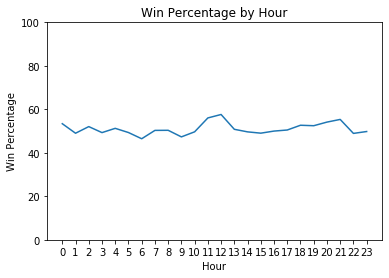

In [22]:
# Extract the hour from the Time column
df['Hour'] = pd.to_datetime(df['UTCTime']).dt.hour

# Calculate win percentage by hour
win_percentage = df.groupby('Hour')['Result'].apply(lambda x: (x == '1-0').sum() / len(x)*100)
win_percentage = dict(win_percentage)

# Plot the win percentage by hour
plt.plot(list(win_percentage.keys()), list(win_percentage.values()))

# Set the title and axis labels
plt.title('Win Percentage by Hour')
plt.xlabel('Hour')
plt.ylabel('Win Percentage')

# Set x-axis ticks to show the 24 hours
plt.xticks(range(24))

plt.ylim(0, 100)
plt.show()